In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [2]:
gray_levels = np.array(range(0,6))
max_gray_level = gray_levels[5]
min_gray_level = gray_levels[0]
min_gray_level,max_gray_level

(0, 5)

In [3]:
def DrawTable(mat, normalized=False):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    colors = plt.cm.binary_r(np.linspace(0, 1, max_gray_level+1))
    tb = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = mat.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(mat):
        if normalized:
            index = int(round(mat[i][j]*max_gray_level,0))
            #print(f'index = {index}')
        else:
            index = mat[i][j]
        tb.add_cell(i, j, width, height, text=round(val,1),loc='center', facecolor=colors[index])
        tb._cells[(i, j)]._text.set_color(colors[~index])
        tb._cells[(i, j)]._text.set_fontsize(14)

    ax.add_table(tb)
    plt.show()
    

In [4]:
def GetTestArray():
    return np.array([0,0,0,5,4,0,0,3,3,2,0,5,5,0,0,4,4,4,0,0,3,5,1,1,0]).reshape(max_gray_level,max_gray_level)

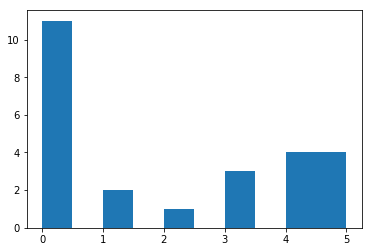

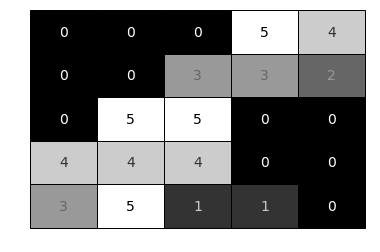

In [5]:
plt.hist(GetTestArray().flatten())
plt.show()
DrawTable(GetTestArray())

In [6]:
def GetPixelCount(PrintVal=False):
    from collections import Counter
    pixel_dict = Counter(GetTestArray().flatten())
    if PrintVal:
        print('GrayLevel \t count')
        for val in  gray_levels:
            print(f'  {val} \t \t  {pixel_dict[val]}')
    return pixel_dict

In [7]:
def Threshold(k=0,normalized=False):
    test = GetTestArray()
    if k > 0:
        for (i,j), val in np.ndenumerate(test):
            if test[i][j] >= k:
                test[i][j] = max_gray_level
            else:
                test[i][j] = min_gray_level
    if normalized:
        norm_test = test/max_gray_level
        DrawTable(norm_test,normalized=True)
    else:
        DrawTable(test)
    return test

In [8]:
#Threshold()

In [9]:
#Threshold(normalized=True)

In [10]:
#Threshold(3)

In [11]:
#Threshold(3,True)

In [12]:
#Threshold(4)

In [13]:
#Threshold(4,True)

In [14]:
#GetPixelCount()

In [15]:
#GetPixelCount(PrintVal=True)

In [16]:
def GetProbabilityDistribution(k=3, Normalize=False,PrintVal=False):
    from collections import Counter
    if Normalize:
        test = Threshold(k)
    else:
        test = GetTestArray()
    pixel_dict = Counter(test.flatten())
    prob_dict = {}
    if PrintVal:
        print('GrayLevel \t Probability')
    for val in  gray_levels:
        prob = pixel_dict[val]/(test.shape[0]*test.shape[1])
        prob_dict[val] = prob
        if PrintVal:
            print(f'  {val} \t \t  {prob}')
    return prob_dict

In [17]:
#GetProbabilityDistribution(PrintVal=True)
#GetProbabilityDistribution()

Now let us prove the following equation
$$\large p_i = \frac{n_i}{N}, \space p_i \geq 0, \space \sum_{i=1}^L p_i = 1 \longrightarrow (1)$$

In [18]:
key, prob = zip(*GetProbabilityDistribution().items())
prob = list(prob)
print(f'prob = {prob}')
print(f'sum of prob = {sum(prob)}')

prob = [0.44, 0.08, 0.04, 0.12, 0.16, 0.16]
sum of prob = 1.0


In [19]:
#th = Threshold(k=3,normalized=True)
#GetProbabilityDistribution(PrintVal=True)

$$\large\omega_0 = Pr(C_0) = \sum_{i=1}^k  p_i = \omega(k) \longrightarrow (2)$$
$$\large\omega_1 = Pr(C_1) = \sum_{i=k+1}^L p_i = 1 - \omega(k)  \longrightarrow (3)$$

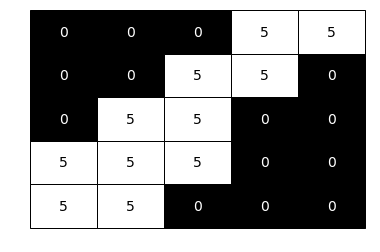

In [20]:
k = 3
prob_dict_norm = GetProbabilityDistribution(k,Normalize=True)

In [21]:
keys, values = zip(*prob_dict_norm.items())
keys,values

((0, 1, 2, 3, 4, 5), (0.56, 0.0, 0.0, 0.0, 0.0, 0.44))

In [22]:
values = list(values)
omega_0 = values[0]
omega_1 = values[5]
omega_0,omega_1

(0.56, 0.44)

In [23]:
from IPython.display import display, Math

display(Math(r'\large \sum_{}^{} p_i = \omega_0 = {} \longrightarrow (2)'.format(min_gray_level, k, omega_0)))
display(Math(r'\large \sum_{}^{} p_i = \omega_1 = {} \longrightarrow (3)'.format(k, max_gray_level, omega_1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let us now solve for equation 4 and 5

$$\large \mu_0 = \sum_{i=1}^{k} i Pr(i\Big|C_0) = \sum_{i=1}^{k} i \frac{p_i}{\omega_0} = \frac{\mu(k)}{\omega(k)} \longrightarrow (4)$$
$$\large \mu_1 = \sum_{i=k+1}^{L} i Pr(i\Big|C_1) = \sum_{i=k+1}^{L} i \frac{p_i}{\omega_1} = \frac{\mu_T-\mu(k)}{1 - \omega(k)} \longrightarrow (5)$$

### Where

$\large \omega(k) = \sum_{i=1}^{k}P_i \longrightarrow (6)$

$\large \mu(k) = \sum_{i=1}^{k}ip_i \longrightarrow (7)$

$\large \mu_T = \mu(L) = \sum_{i=1}^{L}ip_i \longrightarrow (8)$

In [24]:
prob_dict_not_normalized = GetProbabilityDistribution(k,Normalize=False)

In [25]:
intensity, prob = zip(*prob_dict_not_normalized.items())
intensity = list(intensity)
prob = list(prob)

In [62]:
def GetMean(k):
    mu = 0.0
    for val in GetTestArray().flatten():
        if val == k:
            break
        else:
            mu += prob[val]*val
    return mu

In [62]:
def GetMuValNew(k):
    mu = 0
    for val in GetTestArray().flatten():
        if val == k:
            break
        else:
            mu += prob[val]*val
    return mu

In [56]:
def GetMuValOld(k):
    mu = 0
    for i, val in enumerate(gray_levels):
        if i == k:
            pass
        else:
            mu += prob[i]*intensity[i]
    return mu

In [57]:
mu_k = GetMuValNew(k)
mu_k

1.44

In [58]:
mu_T = GetMuVal(max_gray_level+1)
mu_T

1.9600000000000002

In [59]:
#mean of zero
mu_0 = mu_k/omega_0
#mean of one
mu_1 = (mu_T - mu_k)/(1 - omega_0)

In [67]:
display(Math(r'\large \mu_k = {}, \space \mu_T = {}, \space \mu_0 = {}, \space \mu_1 = {}'.format(round(mu_k,2), round(mu_T,2), round(mu_0,2), round(mu_1,2))))

<IPython.core.display.Math object>

### Alternate way to calculate $\mu_T$
$$\large \omega_0\mu_0 \space + \space \omega_1\mu_1 \space = \space \mu_T \longrightarrow (9)$$

In [61]:
new_mu_t = round(omega_0 * mu_0 + omega_1 * mu_1,2)
new_mu_t

1.96

$$\large \sigma_{0}^{2} = \sum_{i=1}^{k}(i-\mu_0)^2 Pr(i\Big|C_0) = \sum_{i=1}^{k}(i-\mu_0)^2 \frac{p_i}{\omega_0} \longrightarrow (10)$$
>
>
$$\large \sigma_{1}^{2} = \sum_{i=k+1}^{L}(i-\mu_1)^2 Pr(i\Big|C_1) = \sum_{i=k+1}^{L}(i-\mu_1)^2 \frac{p_i}{\omega_1} \longrightarrow (11)$$

In [64]:
def GetVariance(k, mu, omega):
    #prob_dict = GetProbabilityDistribution()
    variance = 0.
    for val in GetTestArray().flatten():
        if val == k:
            pass
        else:
            variance += ((val - mu)**2)*prob[val]/omega
    return variance    

In [66]:
GetVariance(3,mu_0,omega_0)

66.95043731778426

In [ ]:
GetVariance()